# Libraries

In [1]:
#install/import packages libraries
from sklearn.metrics import make_scorer, accuracy_score # for accuracy
from sklearn.model_selection import train_test_split # for splitting the train-test data
from sklearn.ensemble import RandomForestClassifier # random forest model
from sklearn.linear_model import LogisticRegression # regression
from sklearn.metrics import classification_report # to create all accuracy matrices
from sklearn.model_selection import GridSearchCV # hyper parameter optimization
from sklearn.metrics import confusion_matrix # cofusion matrix / accuracy
from sklearn.metrics import accuracy_score # accuracy score / accuracy
from sklearn import preprocessing # EDA
from sklearn.metrics import roc_auc_score

import matplotlib.pylab as pylab # visualization
import matplotlib.pyplot as plt # visualization

from pandas import get_dummies # EDA

import matplotlib as mpl  # visualization
import xgboost as xgb # EDA
import seaborn as sns # visualization
import pandas as pd # EDA
import numpy as np # EDA
import matplotlib # visualization
import warnings # EDA
import sklearn # machine learning
import scipy  # EDA
import json # EDA
import sys # EDA
import csv # EDA
import os # to work with the the work libraries / system related variables

In [2]:
# code to see the output of multiple lines of codes
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# Basic operations on data

In [3]:
df_train = pd.read_csv('C://Users//vin//Desktop//Anu//Advrtsmntsuccess//train.csv')

In [4]:
df_train.shape

(26048, 12)

In [5]:
df_train.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

# Statistical Analysis

In [9]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,26048.0,16268.744779,9413.578020,2.0,8095.750000,16237.000000,24413.500000,32561.0
average_runtime(minutes_per_week),26048.0,40.294111,12.479457,1.0,40.000000,40.000000,45.000000,99.0
ratings,26048.0,0.038716,0.075852,0.0,0.027465,0.027465,0.027465,1.0


In [10]:
df_train.dtypes

id                                     int64
realtionship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                 bool
dtype: object

In [11]:
df_train.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

# Data Visualization

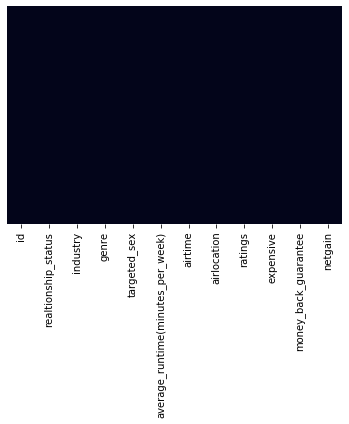

In [12]:
sns.heatmap(df_train.isnull(), yticklabels=False, cbar=False)

In [28]:
numeric_data = df_train.select_dtypes(include = [np.number])
numeric_data.dtypes

id                                     int64
average_runtime(minutes_per_week)      int64
ratings                              float64
netgain                                int64
dtype: object

In [14]:
ctgrl_data = df_train.select_dtypes(exclude=[np.number])
ctgrl_data.dtypes

realtionship_status     object
industry                object
genre                   object
targeted_sex            object
airtime                 object
airlocation             object
expensive               object
money_back_guarantee    object
netgain                   bool
dtype: object

In [15]:
df_train.loc[df_train['netgain'] == False, ['netgain']] = 0
df_train.loc[df_train['netgain'] == True, ['netgain']] = 1

Text(0.5, 1.0, 'Netgain (True/False)')

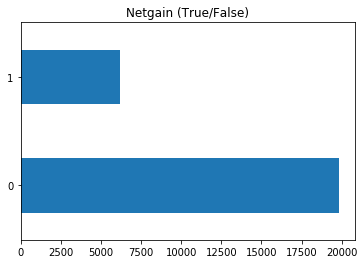

In [19]:
df_train.netgain.value_counts().plot(kind='barh')
plt.title("Netgain (True/False)")

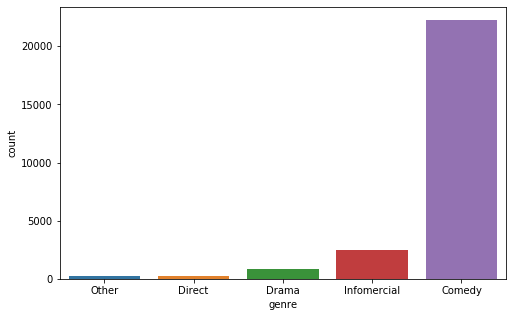

In [20]:
plt.figure(figsize=(8,5))
sns.countplot(x='genre',data=df_train,order=df_train['genre'].value_counts().sort_values().index);

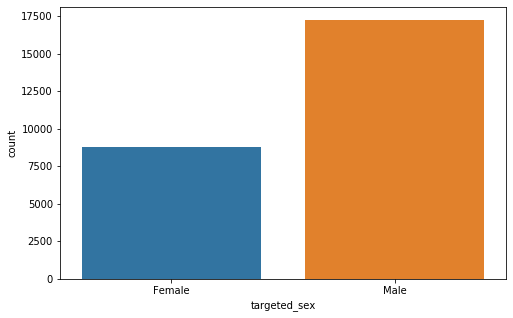

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='targeted_sex',data=df_train,order=df_train['targeted_sex'].value_counts().sort_values().index);

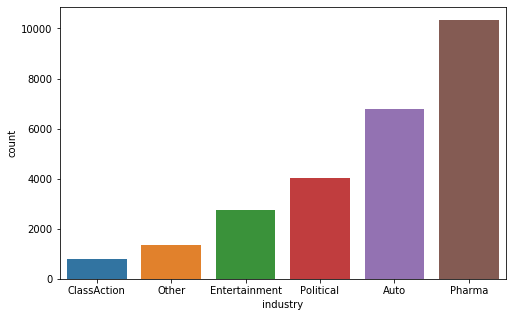

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(x='industry',data=df_train,order=df_train['industry'].value_counts().sort_values().index);

<Figure size 720x432 with 0 Axes>

Text(0.5, 0, 'targeted_sex')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Gender Wise Netgain')

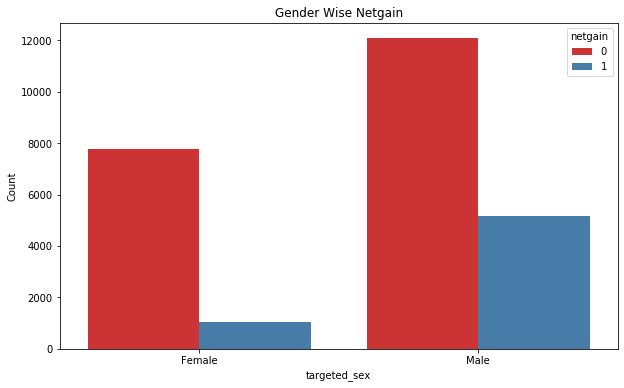

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x='targeted_sex',hue='netgain', data=df_train,palette="Set1",order=df_train['targeted_sex'].value_counts().sort_values().index)
plt.xlabel('targeted_sex')
plt.ylabel('Count')
plt.title('Gender Wise Netgain')
plt.show()

<Figure size 576x360 with 0 Axes>

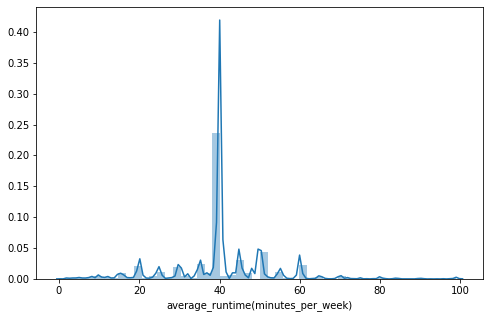

In [24]:
plt.figure(figsize=(8,5))
sns.distplot(df_train['average_runtime(minutes_per_week)'])
plt.show()

Text(0.5, 1, 'boxplot')

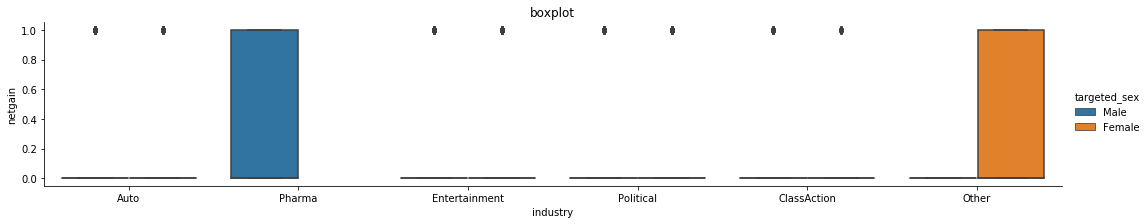

In [25]:
sns.catplot(x='industry',y='netgain',data=df_train,hue='targeted_sex',height=3,aspect=5,kind='box')
plt.title('boxplot')

# Feature Engineeing

In [29]:
corr = numeric_data.corr()
print(corr['netgain'].sort_values(ascending=False))

netgain                              1.000000
ratings                              0.229677
average_runtime(minutes_per_week)    0.204205
id                                   0.006263
Name: netgain, dtype: float64


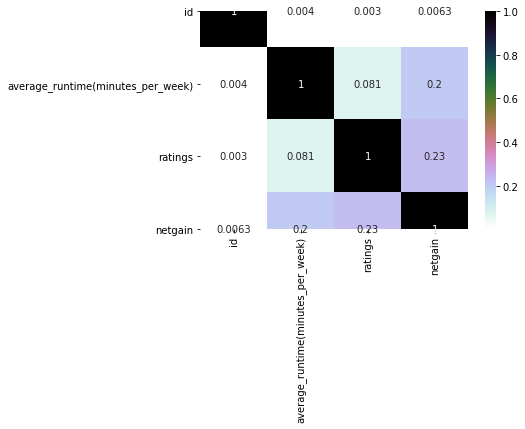

In [27]:
sns.heatmap(df_train.corr(), annot=True, cmap='cubehelix_r')

In [6]:
df_train = pd.get_dummies(df_train, drop_first=True)

In [7]:
x = df_train.drop(['netgain'], axis=1)
y = df_train['netgain']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=123)

# Algorithms & Techniques

## Logistic Regression

In [33]:
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
prediction_train = LogReg.predict(X_train)
acc1 = accuracy_score(y_train,prediction_train)
prediction_test = LogReg.predict(X_test)
acc2 = accuracy_score(y_test,prediction_test)
print("Accuracy on train data is: ", acc1)
print("Accuracy on test data is: ", acc2)

Accuracy on train data is:  0.7800691054681073
Accuracy on test data is:  0.7767114523352527


In [35]:
predicted_netgain = LogReg.predict(X_test)
new = pd.DataFrame({'netgain':y_test})
new = pd.DataFrame({'Original': new.netgain, 'predicted': predicted_netgain})
new.head()

,Original,predicted
9550,0,1
25040,0,0
7865,0,0
15259,1,0
19333,0,0


In [36]:
classification_report(y_test,prediction_test)

'              precision    recall  f1-score   support\n\n           0       0.81      0.93      0.86      5942\n           1       0.57      0.29      0.39      1873\n\n    accuracy                           0.78      7815\n   macro avg       0.69      0.61      0.62      7815\nweighted avg       0.75      0.78      0.75      7815\n'

In [37]:
confusion_matrix(y_test,prediction_test)

array([[5523,  419],
       [1326,  547]], dtype=int64)

In [38]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [39]:
print('recall score is: ', recall_score(y_test,prediction_test))
print('precision score is: ', precision_score(y_test,prediction_test))
print('f1 score is: ', f1_score(y_test,prediction_test))

recall score is:  0.2920448478376935
precision score is:  0.5662525879917184
f1 score is:  0.3853469531525185


In [40]:
roc_auc_score(y_test, prediction_test)

0.6107649348579246

## CV on Logistic Regression

In [41]:
score_LogReg = cross_val_score(LogReg, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", score_LogReg)
print("Mean:", score_LogReg.mean())
print("Standard Deviation:", score_LogReg.std())

C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\vin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warnin

Scores: [0.74958904 0.76699561 0.76851344 0.76193088 0.76302798 0.78716402
 0.78332419 0.75095996 0.76796489 0.76631925]
Mean: 0.7665789262920337
Standard Deviation: 0.011299894087280996


## Random Forest

In [127]:
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)

C:\Users\vin\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [128]:
prediction_train = rfc.predict(X_train)
acc1 = accuracy_score(y_train,prediction_train)
prediction_test = rfc.predict(X_test)
acc2 = accuracy_score(y_test,prediction_test)
print("Accuracy on train data is: ", acc1)
print("Accuracy on test data is: ", acc2)

Accuracy on train data is:  0.977732682498766
Accuracy on test data is:  0.7974408189379398


In [129]:
predicted_netgain = rfc.predict(X_test)
new = pd.DataFrame({'netgain':y_test})
new = pd.DataFrame({'Original': new.netgain, 'predicted': predicted_netgain})
new.head()

,Original,predicted
9550,0,0
25040,0,0
7865,0,0
15259,1,0
19333,0,0


In [130]:
classification_report(y_test,prediction_test)

'              precision    recall  f1-score   support\n\n           0       0.85      0.90      0.87      5942\n           1       0.60      0.48      0.53      1873\n\n    accuracy                           0.80      7815\n   macro avg       0.72      0.69      0.70      7815\nweighted avg       0.79      0.80      0.79      7815\n'

In [131]:
confusion_matrix(y_test,prediction_test)

array([[5337,  605],
       [ 978,  895]], dtype=int64)

In [132]:
print('recall score is: ', recall_score(y_test,prediction_test))
print('precision score is: ', precision_score(y_test,prediction_test))
print('f1 score is: ', f1_score(y_test,prediction_test))

recall score is:  0.4778430325680726
precision score is:  0.5966666666666667
f1 score is:  0.5306848502816482


In [133]:
roc_auc_score(y_test, prediction_test)

0.6880127313631343

## CV on RandomForest

In [134]:
score_rfc = cross_val_score(rfc, X_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", score_rfc)
print("Mean:", score_rfc.mean())
print("Standard Deviation:", score_rfc.std())

Scores: [0.78082192 0.78563596 0.79703785 0.78442128 0.79210093 0.78332419
 0.79594076 0.77729018 0.78826111 0.78496983]
Mean: 0.7869804015468718
Standard Deviation: 0.006057181230637788


## Decision Tree

In [135]:
from sklearn.tree import DecisionTreeClassifier

In [136]:
dt = DecisionTreeClassifier(random_state = 1)
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [137]:
prediction_train = dt.predict(X_train)
acc1 = accuracy_score(y_train,prediction_train)
prediction_test = dt.predict(X_test)
acc2 = accuracy_score(y_test,prediction_test)
print("Accuracy on train data is: ", acc1)
print("Accuracy on test data is: ", acc2)

Accuracy on train data is:  1.0
Accuracy on test data is:  0.7668586052463212


In [138]:
predicted_netgain = dt.predict(X_test)
new = pd.DataFrame({'netgain':y_test})
new = pd.DataFrame({'Original': new.netgain, 'predicted': predicted_netgain})
new.head()

,Original,predicted
9550,0,0
25040,0,0
7865,0,0
15259,1,0
19333,0,0


In [139]:
classification_report(y_test,prediction_test)

'              precision    recall  f1-score   support\n\n           0       0.85      0.85      0.85      5942\n           1       0.51      0.52      0.52      1873\n\n    accuracy                           0.77      7815\n   macro avg       0.68      0.68      0.68      7815\nweighted avg       0.77      0.77      0.77      7815\n'

In [140]:
confusion_matrix(y_test,prediction_test)

array([[5021,  921],
       [ 901,  972]], dtype=int64)

In [141]:
print('recall score is: ', recall_score(y_test,prediction_test))
print('precision score is: ', precision_score(y_test,prediction_test))
print('f1 score is: ', f1_score(y_test,prediction_test))

recall score is:  0.5189535504538174
precision score is:  0.5134706814580031
f1 score is:  0.5161975570897503


In [142]:
roc_auc_score(y_test, prediction_test)

0.681977616694428

## XGBoost 

In [42]:
import xgboost as xgb

In [43]:
xgb = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [44]:
prediction_train = xgb.predict(X_train)
acc1 = accuracy_score(y_train,prediction_train)
prediction_test = xgb.predict(X_test)
acc2 = accuracy_score(y_test,prediction_test)
print("Accuracy on train data is: ", acc1)
print("Accuracy on test data is: ", acc2)

Accuracy on train data is:  0.8233422914495695
Accuracy on test data is:  0.8212412028150992


In [146]:
predicted_netgain = dt.predict(X_test)
new = pd.DataFrame({'netgain':y_test})
new = pd.DataFrame({'Original': new.netgain, 'predicted': predicted_netgain})
new.head()

,Original,predicted
9550,0,0
25040,0,0
7865,0,0
15259,1,0
19333,0,0


In [147]:
classification_report(y_test,prediction_test)

'              precision    recall  f1-score   support\n\n           0       0.84      0.94      0.89      5942\n           1       0.70      0.44      0.54      1873\n\n    accuracy                           0.82      7815\n   macro avg       0.77      0.69      0.72      7815\nweighted avg       0.81      0.82      0.81      7815\n'

In [148]:
confusion_matrix(y_test,prediction_test)

array([[5587,  355],
       [1042,  831]], dtype=int64)

In [149]:
print('recall score is: ', recall_score(y_test,prediction_test))
print('precision score is: ', precision_score(y_test,prediction_test))
print('f1 score is: ', f1_score(y_test,prediction_test))

recall score is:  0.4436732514682328
precision score is:  0.7006745362563238
f1 score is:  0.5433148087610331


In [150]:
roc_auc_score(y_test, prediction_test)

0.6919645287970582

## CV on XGBoost

In [151]:
score_xgb = cross_val_score(rfc, X_train, y_train, cv=5, scoring = "accuracy")
print("Scores:", score_xgb)
print("Mean:", score_xgb.mean())
print("Standard Deviation:", score_xgb.std())

Scores: [0.78015351 0.79462572 0.79539221 0.79511794 0.78798683]
Mean: 0.7906552423073333
Standard Deviation: 0.005924964367216419


## k-nearest neighbor

In [152]:
from sklearn.neighbors import KNeighborsClassifier

In [153]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [154]:
prediction_train = knn.predict(X_train)
acc1 = accuracy_score(y_train,prediction_train)
prediction_test = knn.predict(X_test)
acc2 = accuracy_score(y_test,prediction_test)
print("Accuracy on train data is: ", acc1)
print("Accuracy on test data is: ", acc2)

Accuracy on train data is:  0.7817693193659847
Accuracy on test data is:  0.7394753678822776


In [155]:
predicted_netgain = dt.predict(X_test)
new = pd.DataFrame({'netgain':y_test})
new = pd.DataFrame({'Original': new.netgain, 'predicted': predicted_netgain})
new.head()

,Original,predicted
9550,0,0
25040,0,0
7865,0,0
15259,1,0
19333,0,0


In [156]:
classification_report(y_test,prediction_test)

'              precision    recall  f1-score   support\n\n           0       0.77      0.94      0.85      5942\n           1       0.34      0.09      0.14      1873\n\n    accuracy                           0.74      7815\n   macro avg       0.55      0.52      0.49      7815\nweighted avg       0.66      0.74      0.68      7815\n'

In [157]:
confusion_matrix(y_test,prediction_test)

array([[5613,  329],
       [1707,  166]], dtype=int64)

In [158]:
print('recall score is: ', recall_score(y_test,prediction_test))
print('precision score is: ', precision_score(y_test,prediction_test))
print('f1 score is: ', f1_score(y_test,prediction_test))

recall score is:  0.08862786972770956
precision score is:  0.33535353535353535
f1 score is:  0.1402027027027027


In [159]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

In [160]:
roc_auc_score(y_test, prediction_test)

0.5166296534771164

# Feature importance

In [45]:
from xgboost import plot_importance
from matplotlib import pyplot

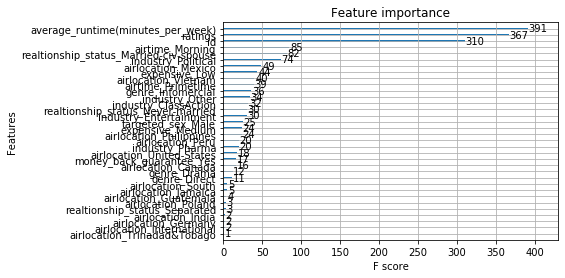

In [46]:
plot_importance(xgb)
pyplot.show()

# Result

<html>
<head>
<style>
table {
  border-collapse: collapse;
  width: 100%;
}
  
th {
  font-weight: bold;
  font-size:20vw;
  color:MediumSeaGreen;
}

td {
  text-align: centre;
  padding: 0px;
}

</style>
</head>
<body>
<div style="overflow-x:auto;">
  <table>
    <tr>
      <th><font size="4" color="#ff0000">Algorithm</font></font></th>
      <th><font size="4" color="#ff0000">Accuracy(Train)</font></font></th>
      <th><font size="4" color="#ff0000">Accuracy(Test)</font></font></th>
      <th><font size="4" color="#ff0000">Recall</font></font></th>
      <th><font size="4" color="#ff0000">Precision</font></font></th>
      <th><font size="4" color="#ff0000">f1 Score</font></font></th>
      <th><font size="4" color="#ff0000">AUC</font></font></th>
    </tr>
    <tr>
      <td><font size="2">LogisticRegression</font></td>
      <td>0.7800</td>
      <td>0.7767</td>
      <td>0.2920</td>
      <td>0.5662</td>
      <td>0.3853</td>
      <td>0.6107</td>
    </tr>
    <tr>
      <td><font size="2">RandomForest</font></td>
      <td>0.9777</td>
      <td>0.7974</td>
      <td>0.4778</td>
      <td>0.5966</td>
      <td>0.5306</td>
      <td>0.6880</td>
    </tr>
    <tr>
      <td><font size="2">DecisionTree</font></td>
      <td>1.0</td>
      <td>0.7668</td>
      <td>0.5189</td>
      <td>0.5134</td>
      <td>0.5161</td>
      <td>0.6819</td>
    </tr>
      <tr>
      <td><font size="4" color="#0000FF">XGBoost</font></td>
      <td><font size="4" color="#0000FF">0.8233</font></td>
      <td><font size="4" color="#0000FF">0.8212</font></td>
      <td><font size="4" color="#0000FF">0.4436</font></td>
      <td><font size="4" color="#0000FF">0.7006</font></td>
      <td><font size="4" color="#0000FF">0.5433</font></td>
      <td><font size="4" color="#0000FF">0.6919</font></td>
    </tr>
      <tr>
      <td><font size="2">KNN</font></td>
      <td>0.7817</td>
      <td>0.7394</td>
      <td>0.0886</td>
      <td>0.3353</td>
      <td>0.1402</td>
      <td>0.3166</td>
    </tr>
  </table>
</div>

</body>
</html>